In [1]:
# import your package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
# set up your API
import quandl
quandl.ApiConfig.api_key = 's-bsuqptLiUnnKtWKKUP'

In [3]:
# get the data on Quandl. 
stocks = ['BAC', 'JPM', 'WFC', 'NDAQ', 'AXP', 'BOH', 'CMA', 'CFR', 'PNC', 'USB', 'TFC', 'ASB']

# if you get canadian data, you use XTSE or EOD for US stocks
data = {}  # set up the dictionary 
for s in stocks :
    data[s] = quandl.get("EOD/"+s) # for US stocks: quandl.get("EOD/"+s) 

In [4]:
# Create a price and trade volume dataframe
prc = pd.DataFrame()  # where to store the price data
vol = pd.DataFrame()  # where to store the volume data
for s in stocks:
    # get the returns
    tmp = data[s][['Close']]  # IMPORTANT: if US stocks, use Adj_Close (includes dividends)
    tmp.columns = [s]  # renaming the column with TICKER name
    prc = pd.concat([prc, tmp], axis=1)
    prc = prc[prc.index.weekday < 5]  # get rid of weekend observations
    


In [5]:
prc = pd.DataFrame(prc)
prc['Date1'] = prc.index
prc = prc[prc['Date1'].between('2008-01-01', '2010-01-01')]



[]

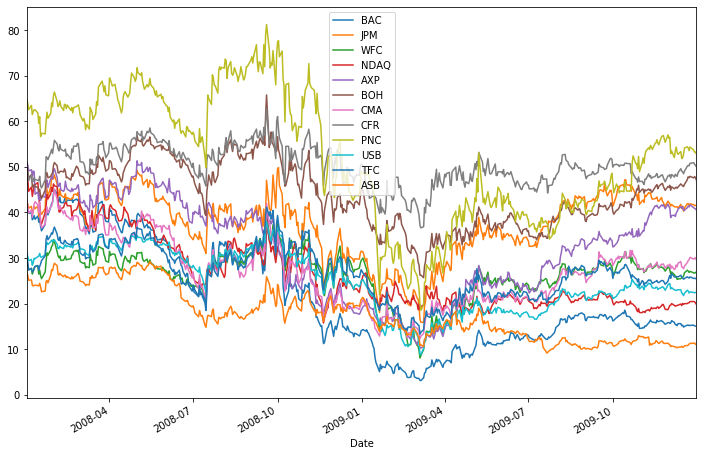

In [6]:
# Make a subplot of the prices of each stock. 
fig = prc[stocks].plot(layout=(4,2), figsize=(12,8), subplots=False)
fig.plot()


In [7]:
bankprc = prc[['BAC', 'JPM', 'WFC', 'AXP', 'BOH', 'CMA', 'CFR', 'PNC', 'USB', 'TFC', 'ASB']]
nasdaq = prc[['NDAQ']]
bankprc['Date1'] = bankprc.index
nasdaq['Date1'] = nasdaq.index
bankprc.head()

C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB,Date1
Date,,,,,,,,,,,,
2008-01-02,40.56,42.17,29.10,51.04,49.89,42.75,49.11,64.73,31.18,29.55,26.71,2008-01-02
2008-01-03,40.30,41.88,28.52,50.41,49.21,41.40,48.47,64.00,30.33,29.12,26.21,2008-01-03
2008-01-04,39.85,40.93,27.49,49.14,47.62,39.92,46.99,62.55,29.44,27.36,25.15,2008-01-04
2008-01-07,39.90,41.34,27.68,49.36,48.26,40.55,48.24,63.47,29.71,27.77,25.20,2008-01-07
2008-01-08,38.41,39.70,26.50,47.95,45.74,38.97,46.70,61.48,28.44,26.88,24.04,2008-01-08


In [8]:
nasdaq.head()

,NDAQ,Date1
Date,,
2008-01-02,48.23,2008-01-02
2008-01-03,47.33,2008-01-03
2008-01-04,44.64,2008-01-04
2008-01-07,45.57,2008-01-07
2008-01-08,43.52,2008-01-08


In [9]:
bankprc['mean'] = bankprc.mean(axis=1)
bankprc


,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB,Date1,mean
Date,,,,,,,,,,,,,
2008-01-02,40.56,42.17,29.10,51.04,49.89,42.75,49.11,64.73,31.18,29.55,26.71,2008-01-02,41.526364
2008-01-03,40.30,41.88,28.52,50.41,49.21,41.40,48.47,64.00,30.33,29.12,26.21,2008-01-03,40.895455
2008-01-04,39.85,40.93,27.49,49.14,47.62,39.92,46.99,62.55,29.44,27.36,25.15,2008-01-04,39.676364
2008-01-07,39.90,41.34,27.68,49.36,48.26,40.55,48.24,63.47,29.71,27.77,25.20,2008-01-07,40.134545
2008-01-08,38.41,39.70,26.50,47.95,45.74,38.97,46.70,61.48,28.44,26.88,24.04,2008-01-08,38.619091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,15.25,41.89,27.09,41.68,47.92,30.16,50.78,54.36,22.58,25.87,11.31,2009-12-24,33.535455
2009-12-28,15.29,41.72,26.75,41.05,47.58,29.78,50.90,53.69,22.47,25.55,11.31,2009-12-28,33.280909
2009-12-29,15.12,41.49,26.68,40.88,47.86,29.96,50.55,53.22,22.39,25.56,11.38,2009-12-29,33.190000


In [10]:
bankprc = pd.merge(bankprc, nasdaq[['NDAQ','Date1']], on=['Date1'], how='left')
bankprc.head()


,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB,Date1,mean,NDAQ
0,40.56,42.17,29.10,51.04,49.89,42.75,49.11,64.73,31.18,29.55,26.71,2008-01-02,41.526364,48.23
1,40.30,41.88,28.52,50.41,49.21,41.40,48.47,64.00,30.33,29.12,26.21,2008-01-03,40.895455,47.33
2,39.85,40.93,27.49,49.14,47.62,39.92,46.99,62.55,29.44,27.36,25.15,2008-01-04,39.676364,44.64
3,39.90,41.34,27.68,49.36,48.26,40.55,48.24,63.47,29.71,27.77,25.20,2008-01-07,40.134545,45.57
4,38.41,39.70,26.50,47.95,45.74,38.97,46.70,61.48,28.44,26.88,24.04,2008-01-08,38.619091,43.52


In [11]:
graph = bankprc[['mean','NDAQ','Date1']]
graph.set_index('Date1', inplace=True)
graph.head(5)


,mean,NDAQ
Date1,,
2008-01-02,41.526364,48.23
2008-01-03,40.895455,47.33
2008-01-04,39.676364,44.64
2008-01-07,40.134545,45.57
2008-01-08,38.619091,43.52


Text(0, 0.5, 'Price (USD)')

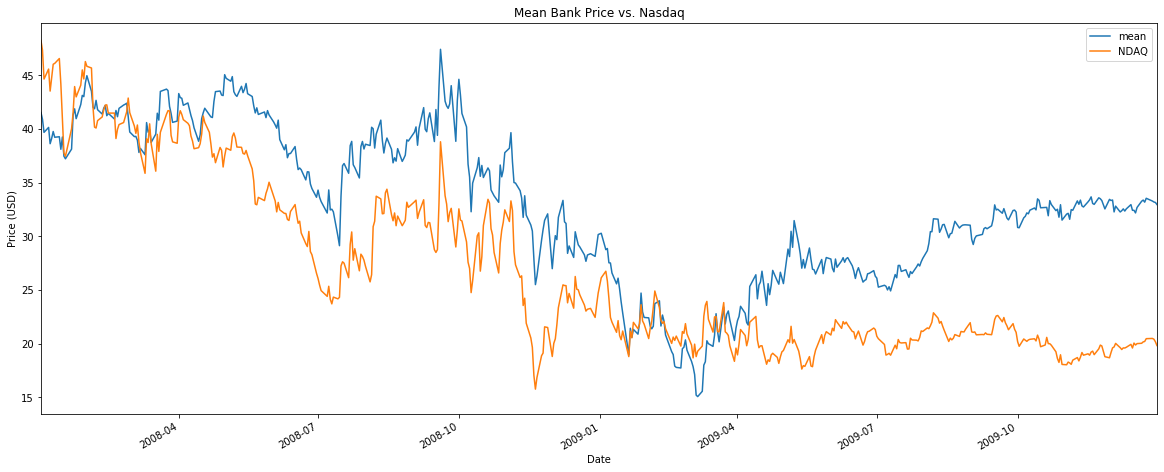

In [12]:
graph.plot(figsize=(20,8))
plt.title('Mean Bank Price vs. Nasdaq')
plt.xlabel('Date')
plt.ylabel('Price (USD)')


In [13]:
bankreturns = bankprc[['BAC', 'JPM', 'WFC', 'AXP', 'BOH', 'CMA', 'CFR', 'PNC', 'USB', 'TFC', 'ASB','Date1']]
bankreturns.set_index('Date1', inplace=True)
bankreturns

,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB
Date1,,,,,,,,,,,
2008-01-02,40.56,42.17,29.10,51.04,49.89,42.75,49.11,64.73,31.18,29.55,26.71
2008-01-03,40.30,41.88,28.52,50.41,49.21,41.40,48.47,64.00,30.33,29.12,26.21
2008-01-04,39.85,40.93,27.49,49.14,47.62,39.92,46.99,62.55,29.44,27.36,25.15
2008-01-07,39.90,41.34,27.68,49.36,48.26,40.55,48.24,63.47,29.71,27.77,25.20
2008-01-08,38.41,39.70,26.50,47.95,45.74,38.97,46.70,61.48,28.44,26.88,24.04
...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,15.25,41.89,27.09,41.68,47.92,30.16,50.78,54.36,22.58,25.87,11.31
2009-12-28,15.29,41.72,26.75,41.05,47.58,29.78,50.90,53.69,22.47,25.55,11.31
2009-12-29,15.12,41.49,26.68,40.88,47.86,29.96,50.55,53.22,22.39,25.56,11.38


In [14]:
bankreturns = bankreturns.pct_change(1)
bankreturns.head()

,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB
Date1,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.006410,-0.006877,-0.019931,-0.012343,-0.013630,-0.031579,-0.013032,-0.011278,-0.027261,-0.014552,-0.018720
2008-01-04,-0.011166,-0.022684,-0.036115,-0.025193,-0.032311,-0.035749,-0.030534,-0.022656,-0.029344,-0.060440,-0.040443
2008-01-07,0.001255,0.010017,0.006912,0.004477,0.013440,0.015782,0.026601,0.014708,0.009171,0.014985,0.001988
2008-01-08,-0.037343,-0.039671,-0.042630,-0.028566,-0.052217,-0.038964,-0.031924,-0.031353,-0.042747,-0.032049,-0.046032


In [15]:
bankreturns['Average Return'] = bankreturns.mean(axis=1)
bankreturns['Date2'] = bankreturns.index
bankreturns.head()

,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB,Average Return,Date2
Date1,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-02
2008-01-03,-0.006410,-0.006877,-0.019931,-0.012343,-0.013630,-0.031579,-0.013032,-0.011278,-0.027261,-0.014552,-0.018720,-0.015965,2008-01-03
2008-01-04,-0.011166,-0.022684,-0.036115,-0.025193,-0.032311,-0.035749,-0.030534,-0.022656,-0.029344,-0.060440,-0.040443,-0.031512,2008-01-04
2008-01-07,0.001255,0.010017,0.006912,0.004477,0.013440,0.015782,0.026601,0.014708,0.009171,0.014985,0.001988,0.010849,2008-01-07
2008-01-08,-0.037343,-0.039671,-0.042630,-0.028566,-0.052217,-0.038964,-0.031924,-0.031353,-0.042747,-0.032049,-0.046032,-0.038500,2008-01-08


In [16]:
nasdaq.set_index('Date1', inplace=True)
nasdaq

,NDAQ
Date1,
2008-01-02,48.23
2008-01-03,47.33
2008-01-04,44.64
2008-01-07,45.57
2008-01-08,43.52
...,...
2009-12-24,20.46
2009-12-28,20.48
2009-12-29,20.41


In [17]:
nasdaqreturns = nasdaq.pct_change(1)
nasdaqreturns['Date2'] = nasdaqreturns.index
nasdaqreturns.head()

,NDAQ,Date2
Date1,,
2008-01-02,NaN,2008-01-02
2008-01-03,-0.018661,2008-01-03
2008-01-04,-0.056835,2008-01-04
2008-01-07,0.020833,2008-01-07
2008-01-08,-0.044986,2008-01-08


In [18]:
bankreturns = pd.merge(bankreturns, nasdaqreturns[['NDAQ','Date2']], on=['Date2'], how='left')
bankreturns.head()


,BAC,JPM,WFC,AXP,BOH,CMA,CFR,PNC,USB,TFC,ASB,Average Return,Date2,NDAQ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-02,NaN
1,-0.006410,-0.006877,-0.019931,-0.012343,-0.013630,-0.031579,-0.013032,-0.011278,-0.027261,-0.014552,-0.018720,-0.015965,2008-01-03,-0.018661
2,-0.011166,-0.022684,-0.036115,-0.025193,-0.032311,-0.035749,-0.030534,-0.022656,-0.029344,-0.060440,-0.040443,-0.031512,2008-01-04,-0.056835
3,0.001255,0.010017,0.006912,0.004477,0.013440,0.015782,0.026601,0.014708,0.009171,0.014985,0.001988,0.010849,2008-01-07,0.020833
4,-0.037343,-0.039671,-0.042630,-0.028566,-0.052217,-0.038964,-0.031924,-0.031353,-0.042747,-0.032049,-0.046032,-0.038500,2008-01-08,-0.044986


In [19]:
graphreturns = bankreturns[['Average Return','NDAQ','Date2']]
graphreturns.set_index('Date2', inplace=True)
graphreturns.head(5)


,Average Return,NDAQ
Date2,,
2008-01-02,NaN,NaN
2008-01-03,-0.015965,-0.018661
2008-01-04,-0.031512,-0.056835
2008-01-07,0.010849,0.020833
2008-01-08,-0.038500,-0.044986


Text(0, 0.5, 'Return (%)')

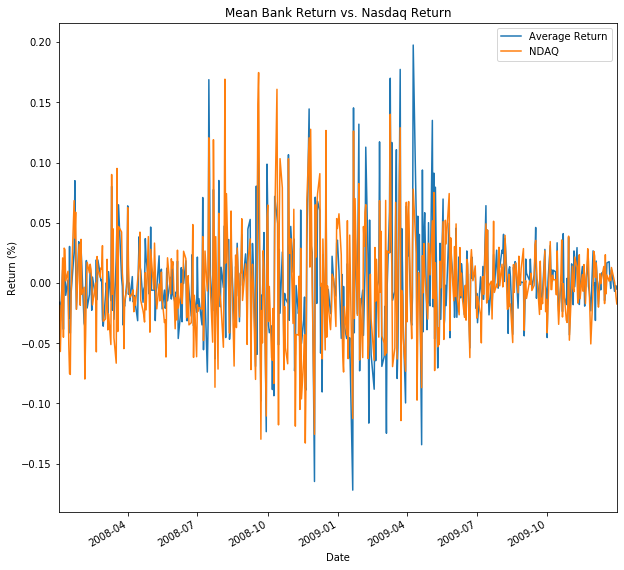

In [20]:
graphreturns.plot(figsize=(10,10))
plt.title('Mean Bank Return vs. Nasdaq Return')
plt.xlabel('Date')
plt.ylabel('Return (%)')

   

In [27]:
bankreturns["Average_Return"] = bankreturns[['Average Return']]

In [28]:
import statsmodels.formula.api as smf
reg = smf.ols('Average_Return~NDAQ', data=bankreturns).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average_Return   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     543.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           5.84e-82
Time:                        18:01:10   Log-Likelihood:                 1046.2
No. Observations:                 504   AIC:                            -2088.
Df Residuals:                     502   BIC:                            -2080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.001      0.903      0.367      -0.001       0.004
NDAQ           0.7094      0.030     23.303      0.000       0.650       0.769
==============================================================================
Omnibus:                       37.004   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.299
Skew:                           0.174   Prob(JB):                     1.53e-30
Kurtosis:                       5.533   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""